In [ ]:
#Steps to install NLTK and its data:
!pip install spacy

#Install NLTK: run in terminal :
!pip install nltk

In [1]:
# Import modules
import numpy as np
import pandas as pd
import nltk
import spacy

# Set seed for reproducibility
np.random.seed(5)

# Read in IMDb and Wikipedia movie data (both in same file)
movies_df = pd.read_csv(r"C:\Users\excel\DATA Science\Datasets\movies.csv")
print("Number of movies loaded: %s " % (len(movies_df)))
# Display the data
print(movies_df.head())

Number of movies loaded: 99 
   rank                     title                                    genre  \
0     0             The Godfather                   [u' Crime', u' Drama']   
1     1  The Shawshank Redemption                   [u' Crime', u' Drama']   
2     2          Schindler's List  [u' Biography', u' Drama', u' History']   
3     3               Raging Bull    [u' Biography', u' Drama', u' Sport']   
4     4                Casablanca        [u' Drama', u' Romance', u' War']   

                                           wiki_plot  \
0  On the day of his only daughter's wedding, Vit...   
1  In 1947, banker Andy Dufresne is convicted of ...   
2  In 1939, the Germans move Polish Jews into the...   
3  In a brief scene in 1964, an aging, overweight...   
4  It is early December 1941. American expatriate...   

                                           imdb_plot  
0  In late summer 1945, guests are gathered for t...  
1  In 1947, Andy Dufresne (Tim Robbins), a banker...  


In [2]:
# Combine wiki_plot and imdb_plot into a single column
movies_df["plot"] = movies_df["wiki_plot"].astype(str) + "\n" + movies_df["imdb_plot"].astype(str)

# Inspect the new DataFrame
movies_df.head()

rank                     title                                    genre  \
0     0             The Godfather                   [u' Crime', u' Drama']   
1     1  The Shawshank Redemption                   [u' Crime', u' Drama']   
2     2          Schindler's List  [u' Biography', u' Drama', u' History']   
3     3               Raging Bull    [u' Biography', u' Drama', u' Sport']   
4     4                Casablanca        [u' Drama', u' Romance', u' War']   

                                           wiki_plot  \
0  On the day of his only daughter's wedding, Vit...   
1  In 1947, banker Andy Dufresne is convicted of ...   
2  In 1939, the Germans move Polish Jews into the...   
3  In a brief scene in 1964, an aging, overweight...   
4  It is early December 1941. American expatriate...   

                                           imdb_plot  \
0  In late summer 1945, guests are gathered for t...   
1  In 1947, Andy Dufresne (Tim Robbins), a banker...   
2  The relocation of Polish Jews from surrounding...   
3  The film opens in 1964, where an older and fat...   
4  In the early years of World War II, December 1...   

                                                plot  
0  On the day of his only daughter's wedding, Vit...  
1  In 1947, banker Andy Dufresne is convicted of ...  
2  In 1939, the Germans move Polish Jews into the...  
3  In a brief scene in 1964, an aging, overweight...  
4  It is early December 1941. American expatriate...

In [3]:
movies_df["plot"][0]

'On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson   Johnny Fontane  Johnny Fontane  , a popul

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\excel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Tokenize a paragraph into sentences and store in sent_tokenized
sentence_tokenized = [sent for sent in nltk.sent_tokenize("""On the day +91 May 2016 of his only daughter\'s wedding.
                                                            Vito Corleone hears. requests in his role as the Godfather.
                                                            The Don of a New York crime family.""")]
print(sentence_tokenized)

["On the day +91 May 2016 of his only daughter's wedding.", 'Vito Corleone hears.', 'requests in his role as the Godfather.', 'The Don of a New York crime family.']


In [10]:
print('Word Tokenize:')
# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sentence_tokenized[0])]
print(words_tokenized)

Word Tokenize:
['On', 'the', 'day', '+91', 'May', '2016', 'of', 'his', 'only', 'daughter', "'s", 'wedding', '.']


In [15]:
# Remove tokens that do not contain any letters from words_tokenized
import re
filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]
# Display filtered words to observe words after tokenization
print(filtered)

['On', 'the', 'day', 'May', 'of', 'his', 'only', 'daughter', "'s", 'wedding']


In [16]:
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")
# Print filtered to observe words without stemming
print("Before stemming: ", filtered)
# Stem the words from filtered and store in stemmed_words
stemmed_words = [stemmer.stem(t) for t in filtered]
# Print the stemmed_words to observe words after stemming
print("After stemming:   ", stemmed_words)

Before stemming:  ['On', 'the', 'day', 'May', 'of', 'his', 'only', 'daughter', "'s", 'wedding']
After stemming:    ['on', 'the', 'day', 'may', 'of', 'his', 'onli', 'daughter', "'s", 'wed']


In [59]:
movies_df['plot'][0]

'On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson   Johnny Fontane  Johnny Fontane  , a popul

In [33]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    # Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]   
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]   
    # Stem the filtered_tokens
    stems = [stemmer.stem(t) for t in filtered_tokens]  
    return stems

In [34]:
words_stemmed = tokenize_and_stem("""On the day of his only daughter\'s wedding, 
Vito Corleone hears requests in his role as the Godfather, the Don of a New York 
crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces 
his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson 
Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, 
so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive 
studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the 
severed head of his prized stallion.""")
print(words_stemmed)

['on', 'the', 'day', 'of', 'his', 'onli', 'daughter', "'s", 'wed', 'vito', 'corleon', 'hear', 'request', 'in', 'his', 'role', 'as', 'the', 'godfath', 'the', 'don', 'of', 'a', 'new', 'york', 'crime', 'famili', 'vito', "'s", 'youngest', 'son', 'michael', 'in', 'a', 'marin', 'corp', 'uniform', 'introduc', 'his', 'girlfriend', 'kay', 'adam', 'to', 'his', 'famili', 'at', 'the', 'sprawl', 'recept', 'vito', "'s", 'godson', 'johnni', 'fontan', 'a', 'popular', 'singer', 'plead', 'for', 'help', 'in', 'secur', 'a', 'covet', 'movi', 'role', 'so', 'vito', 'dispatch', 'his', 'consiglier', 'tom', 'hagen', 'to', 'los', 'angel', 'to', 'influenc', 'the', 'abras', 'studio', 'head', 'jack', 'woltz', 'woltz', 'is', 'unmov', 'until', 'the', 'morn', 'he', 'wake', 'up', 'in', 'bed', 'with', 'the', 'sever', 'head', 'of', 'his', 'prize', 'stallion']


In [19]:
len(movies_df['plot'][0])

26878

In [20]:
type(movies_df['plot'][0])

str

In [21]:
words_stemmed_0 = tokenize_and_stem(movies_df['plot'][0])
len(words_stemmed_0)

4534

In [37]:
len(movies_df)

99

In [35]:
movie_token = []
for i in movies_df['plot']:
    tk = tokenize_and_stem(i)
    movie_token.append(tk)
    print(tk)

['on', 'the', 'day', 'of', 'his', 'onli', 'daughter', "'s", 'wed', 'vito', 'corleon', 'hear', 'request', 'in', 'his', 'role', 'as', 'the', 'godfath', 'the', 'don', 'of', 'a', 'new', 'york', 'crime', 'famili', 'vito', "'s", 'youngest', 'son', 'michael', 'in', 'a', 'marin', 'corp', 'uniform', 'introduc', 'his', 'girlfriend', 'kay', 'adam', 'to', 'his', 'famili', 'at', 'the', 'sprawl', 'recept', 'vito', "'s", 'godson', 'johnni', 'fontan', 'a', 'popular', 'singer', 'plead', 'for', 'help', 'in', 'secur', 'a', 'covet', 'movi', 'role', 'so', 'vito', 'dispatch', 'his', 'consiglier', 'tom', 'hagen', 'to', 'los', 'angel', 'to', 'influenc', 'the', 'abras', 'studio', 'head', 'jack', 'woltz', 'woltz', 'is', 'unmov', 'until', 'the', 'morn', 'he', 'wake', 'up', 'in', 'bed', 'with', 'the', 'sever', 'head', 'of', 'his', 'prize', 'stallion', 'on', 'the', 'day', 'of', 'his', 'onli', 'daughter', "'s", 'wed', 'vito', 'corleon', 'vito', 'corleon', 'hear', 'request', 'in', 'his', 'role', 'as', 'the', 'godfat

['it', 'is', 'earli', 'decemb', 'american', 'expatri', 'rick', 'blain', 'is', 'the', 'proprietor', 'of', 'an', 'upscal', 'nightclub', 'and', 'gambl', 'den', 'in', 'casablanca', 'rick', "'s", 'café', 'américain', 'attract', 'a', 'vari', 'clientel', 'vichi', 'french', 'italian', 'and', 'german', 'offici', 'refuge', 'desper', 'to', 'reach', 'the', 'still', 'neutral', 'unit', 'state', 'and', 'those', 'who', 'prey', 'on', 'them', 'although', 'rick', 'profess', 'to', 'be', 'neutral', 'in', 'all', 'matter', 'it', 'is', 'later', 'reveal', 'he', 'ran', 'gun', 'to', 'ethiopia', 'dure', 'it', 'war', 'with', 'itali', 'and', 'fought', 'on', 'the', 'loyalist', 'side', 'against', 'the', 'fascist', 'nationalist', 'in', 'the', 'spanish', 'civil', 'war', 'it', 'is', 'earli', 'decemb', 'american', 'expatri', 'expatri', 'rick', 'blain', 'is', 'the', 'proprietor', 'of', 'an', 'upscal', 'nightclub', 'and', 'gambl', 'den', 'in', 'casablanca', 'casablanca', 'rick', "'s", 'café', 'américain', 'attract', 'a', '

['part', 'part', 'part', 'on', 'the', 'eve', 'of', 'the', 'american', 'civil', 'war', 'in', 'scarlett', "o'hara", 'live', 'at', 'tara', 'her', 'famili', "'s", 'cotton', 'plantat', 'in', 'georgia', 'with', 'her', 'parent', 'and', 'two', 'sister', 'scarlett', 'learn', 'that', 'ashley', 'wilkes—whom', 'she', 'secret', 'loves—i', 'to', 'be', 'marri', 'to', 'his', 'cousin', 'melani', 'hamilton', 'and', 'the', 'engag', 'is', 'to', 'be', 'announc', 'the', 'next', 'day', 'at', 'a', 'barbecu', 'at', 'ashley', "'s", 'home', 'the', 'nearbi', 'plantat', 'twelv', 'oak', 'on', 'the', 'eve', 'of', 'the', 'american', 'civil', 'war', 'american', 'civil', 'war', 'in', 'scarlett', "o'hara", 'scarlett', "o'hara", 'live', 'at', 'tara', 'tara', 'her', 'famili', "'s", 'cotton', 'plantat', 'plantat', 'in', 'georgia', 'georgia', 'with', 'her', 'parent', 'and', 'two', 'sister', 'scarlett', 'learn', 'that', 'ashley', 'wilk', 'ashley', 'wilk', '—whom', 'she', 'secret', 'loves—i', 'to', 'be', 'marri', 'to', 'his',

['in', 'treasur', 'hunter', 'brock', 'lovett', 'and', 'his', 'team', 'aboard', 'the', 'research', 'vessel', 'keldysh', 'search', 'the', 'wreck', 'of', 'rms', 'titan', 'for', 'a', 'necklac', 'with', 'a', 'rare', 'diamond', 'the', 'heart', 'of', 'the', 'ocean', 'they', 'recov', 'a', 'safe', 'contain', 'a', 'draw', 'of', 'a', 'young', 'woman', 'wear', 'the', 'necklac', 'date', 'april', 'the', 'day', 'the', 'ship', 'struck', 'the', 'iceberg', 'note', 'rose', 'dawson', 'calvert', 'the', 'woman', 'in', 'the', 'draw', 'is', 'brought', 'aboard', 'the', 'keldysh', 'and', 'tell', 'lovett', 'of', 'her', 'experi', 'aboard', 'the', 'titan', 'in', 'treasur', 'hunter', 'brock', 'lovett', 'and', 'his', 'team', 'aboard', 'the', 'research', 'vessel', 'keldysh', 'keldysh', 'search', 'the', 'wreck', 'of', 'rms', 'titan', 'rms', 'titan', 'titan', 'for', 'a', 'necklac', 'with', 'a', 'rare', 'diamond', 'the', 'heart', 'of', 'the', 'ocean', 'heart', 'of', 'the', 'ocean', 'they', 'recov', 'a', 'safe', 'contain

['patrick', 'bateman', 'is', 'a', 'wealthi', 'invest', 'banker', 'live', 'in', 'manhattan', 'in', 'the', 'late', '1980s', 'his', 'life', 'revolv', 'around', 'dine', 'at', 'trendi', 'restaur', 'while', 'keep', 'up', 'appear', 'for', 'his', 'fiancé', 'evelyn', 'and', 'for', 'his', 'circl', 'of', 'equal', 'wealthi', 'and', 'shallow', 'friend', 'most', 'of', 'whom', 'he', 'dislik', 'howev', 'he', 'also', 'lead', 'a', 'secret', 'life', 'as', 'a', 'serial', 'killer', 'throughout', 'the', 'film', 'bateman', 'describ', 'the', 'materi', 'accoutr', 'of', 'his', 'lifestyl', 'his', 'daili', 'morn', 'exercis', 'and', 'beautif', 'routin', 'his', 'music', 'collect', 'includ', 'perform', 'such', 'as', 'huey', 'lewi', 'and', 'the', 'news', 'phil', 'collin', 'and', 'whitney', 'houston', 'his', 'tast', 'for', 'expens', 'design', 'cloth', 'and', 'the', 'lavish', 'coutur', 'of', 'his', 'apart', 'in', 'one', 'scene', 'bateman', 'and', 'his', 'associ', 'flaunt', 'their', 'busi', 'card', 'in', 'a', 'display',

['mob-connect', 'union', 'boss', 'johnni', 'friend', 'lee', 'j.', 'cobb', 'gloat', 'about', 'his', 'iron-fist', 'control', 'of', 'the', 'waterfront', 'the', 'polic', 'and', 'the', 'waterfront', 'crime', 'commiss', 'know', 'that', 'friend', 'is', 'behind', 'a', 'number', 'of', 'murder', 'but', 'wit', 'play', 'd', 'and', 'd', 'deaf', 'and', 'dumb', 'accept', 'their', 'subservi', 'posit', 'rather', 'than', 'risk', 'the', 'danger', 'and', 'shame', 'of', 'inform', 'mob', 'mob', '-connect', 'union', 'boss', 'johnni', 'friend', 'lee', 'j.', 'cobb', 'lee', 'j.', 'cobb', 'gloat', 'about', 'his', 'iron-fist', 'control', 'of', 'the', 'waterfront', 'the', 'polic', 'and', 'the', 'waterfront', 'crime', 'commiss', 'waterfront', 'crime', 'commiss', 'know', 'that', 'friend', 'is', 'behind', 'a', 'number', 'of', 'murder', 'but', 'wit', 'play', 'd', 'and', 'd', 'deaf', 'and', 'dumb', 'accept', 'their', 'subservi', 'posit', 'rather', 'than', 'risk', 'the', 'danger', 'and', 'shame', 'of', 'inform', 'terri'

['the', 'galaxi', 'is', 'in', 'a', 'civil', 'war', 'and', 'spi', 'for', 'the', 'rebel', 'allianc', 'have', 'stolen', 'plan', 'to', 'the', 'galact', 'empir', "'s", 'death', 'star', 'a', 'heavili', 'arm', 'and', 'armor', 'space', 'station', 'capabl', 'of', 'destroy', 'an', 'entir', 'planet', 'rebel', 'leader', 'princess', 'leia', 'is', 'in', 'possess', 'of', 'the', 'plan', 'but', 'her', 'ship', 'is', 'captur', 'by', 'imperi', 'forc', 'under', 'the', 'command', 'of', 'the', 'evil', 'lord', 'darth', 'vader', 'befor', 'she', 'is', 'captur', 'leia', 'hide', 'the', 'plan', 'in', 'the', 'memori', 'of', 'an', 'astromech', 'droid', 'call', 'r2-d2', 'along', 'with', 'a', 'holograph', 'record', 'the', 'small', 'droid', 'flee', 'to', 'the', 'surfac', 'of', 'the', 'desert', 'planet', 'tatooin', 'with', 'fellow', 'protocol', 'droid', 'c-3po', 'the', 'galaxi', 'is', 'in', 'a', 'civil', 'war', 'civil', 'war', 'and', 'spi', 'for', 'the', 'rebel', 'allianc', 'rebel', 'allianc', 'have', 'stolen', 'plan', 

['a', 'woman', 'identifi', 'herself', 'as', 'evelyn', 'mulwray', 'ladd', 'hire', 'privat', 'investig', 'j.j.', 'jake', 'gitt', 'nicholson', 'to', 'carri', 'out', 'surveil', 'on', 'her', 'husband', 'holli', 'i.', 'mulwray', 'zwerl', 'the', 'chief', 'engin', 'for', 'the', 'los', 'angel', 'depart', 'of', 'water', 'and', 'power', 'gitt', 'tail', 'him', 'hear', 'him', 'public', 'oppos', 'the', 'creation', 'of', 'a', 'new', 'reservoir', 'and', 'shoot', 'photograph', 'of', 'him', 'with', 'a', 'young', 'woman', 'palmer', 'which', 'are', 'publish', 'on', 'the', 'front', 'page', 'of', 'the', 'follow', 'day', "'s", 'paper', 'upon', 'his', 'return', 'to', 'his', 'offic', 'gitt', 'is', 'confront', 'by', 'a', 'beauti', 'woman', 'who', 'after', 'establish', 'that', 'the', 'two', 'of', 'them', 'have', 'never', 'met', 'irat', 'inform', 'him', 'she', 'is', 'the', 'real', 'evelyn', 'mulwray', 'dunaway', 'and', 'that', 'he', 'can', 'expect', 'a', 'lawsuit', 'a', 'woman', 'identifi', 'herself', 'as', 'evel

['donna', 'reed', 'as', 'mari', 'bailey', 'and', 'jame', 'stewart', 'play', 'georg', 'bailey', 'donna', 'reed', 'as', 'mari', 'bailey', 'and', 'jame', 'stewart', 'play', 'georg', 'bailey', 'donna', 'reed', 'as', 'mari', 'bailey', 'and', 'jame', 'stewart', 'play', 'georg', 'bailey', 'donna', 'reed', 'donna', 'reed', 'as', 'mari', 'bailey', 'and', 'jame', 'stewart', 'jame', 'stewart', 'play', 'georg', 'bailey', 'in', 'bedford', 'fall', 'new', 'york', 'n', 'on', 'christma', 'eve', 'georg', 'bailey', 'is', 'deepli', 'troubl', 'and', 'suicid', 'prayer', 'for', 'his', 'well-b', 'from', 'friend', 'and', 'famili', 'reach', 'heaven', 'clarenc', 'odbodi', 'angel', '2nd', 'class', 'is', 'assign', 'to', 'visit', 'earth', 'to', 'save', 'georg', 'therebi', 'earn', 'his', 'wing', 'god', 'the', 'father', 'and', 'st.', 'joseph', 'review', 'georg', "'s", 'life', 'with', 'clarenc', 'in', 'bedford', 'fall', 'bedford', 'fall', 'new', 'york', 'new', 'york', 'n', 'n', 'n', 'on', 'christma', 'eve', 'georg', '

['unit', 'state', 'air', 'forc', 'brigadi', 'general', 'jack', 'd.', 'ripper', 'sterl', 'hayden', 'is', 'command', 'of', 'burpelson', 'air', 'forc', 'base', 'which', 'hous', 'the', 'sac', '843rd', 'bomb', 'wing', 'equip', 'with', 'b-52', 'bomber', 'the', '843rd', 'is', 'current', 'on', 'airborn', 'alert', 'in', 'flight', 'just', 'hour', 'from', 'the', 'soviet', 'border', 'unit', 'state', 'air', 'forc', 'unit', 'state', 'air', 'forc', 'brigadi', 'general', 'brigadi', 'general', 'jack', 'd.', 'ripper', 'sterl', 'hayden', 'is', 'command', 'of', 'burpelson', 'air', 'forc', 'base', 'which', 'hous', 'the', 'sac', 'sac', '843rd', 'bomb', 'wing', 'equip', 'with', 'b-52', 'b-52', 'bomber', 'the', '843rd', 'is', 'current', 'on', 'airborn', 'alert', 'in', 'flight', 'just', 'hour', 'from', 'the', 'soviet', 'border', 'general', 'ripper', 'explain', 'to', 'group', 'captain', 'mandrak', 'how', 'he', 'first', 'discov', 'the', 'communist', 'plot', 'to', 'pollut', 'american', 'precious', 'bodili', 'flui

['in', 'a', 'flashback', 'the', 'hobbit', 'déagol', 'and', 'sméagol', 'are', 'fish', 'near', 'the', 'gladden', 'field', 'when', 'déagol', 'accident', 'goe', 'overboard', 'and', 'discov', 'the', 'one', 'ring', 'in', 'the', 'river', 'bed', 'sméagol', 'immedi', 'corrupt', 'by', 'the', 'ring', 'murder', 'déagol', 'for', 'it', 'and', 'is', 'later', 'exil', 'into', 'the', 'wilder', 'where', 'he', 'eventu', 'becom', 'the', 'creatur', 'gollum', 'in', 'the', 'present', 'gollum', 'is', 'lead', 'frodo', 'baggin', 'and', 'samwis', 'gamge', 'to', 'an', 'entranc', 'near', 'mina', 'morgul', 'in', 'a', 'flashback', 'the', 'hobbit', 'hobbit', 'déagol', 'déagol', 'and', 'sméagol', 'sméagol', 'are', 'fish', 'near', 'the', 'gladden', 'field', 'gladden', 'field', 'when', 'déagol', 'accident', 'goe', 'overboard', 'and', 'discov', 'the', 'one', 'ring', 'one', 'ring', 'in', 'the', 'river', 'bed', 'sméagol', 'immedi', 'corrupt', 'by', 'the', 'ring', 'murder', 'déagol', 'for', 'it', 'and', 'is', 'later', 'exil'

['on', 'the', 'morn', 'of', 'june', 'the', 'begin', 'of', 'the', 'normandi', 'invas', 'american', 'soldier', 'prepar', 'to', 'land', 'on', 'omaha', 'beach', 'they', 'struggl', 'against', 'german', 'infantri', 'machin', 'gun', 'nest', 'and', 'artilleri', 'fire', 'captain', 'john', 'h.', 'miller', 'a', 'compani', 'command', 'of', 'the', '2nd', 'ranger', 'battalion', 'surviv', 'the', 'initi', 'land', 'and', 'assembl', 'a', 'group', 'of', 'his', 'ranger', 'to', 'penetr', 'the', 'german', 'defenc', 'lead', 'to', 'a', 'breakout', 'from', 'the', 'beach', 'in', 'washington', 'd.c', 'at', 'the', 'u.s.', 'war', 'depart', 'general', 'georg', 'marshal', 'is', 'inform', 'that', 'three', 'of', 'the', 'four', 'brother', 'of', 'the', 'ryan', 'famili', 'were', 'kill', 'in', 'action', 'and', 'that', 'their', 'mother', 'is', 'to', 'receiv', 'all', 'three', 'telegram', 'in', 'the', 'same', 'day', 'he', 'learn', 'that', 'the', 'fourth', 'son', 'privat', 'first', 'class', 'jame', 'franci', 'ryan', 'is', 'a'

['on', 'novemb', 'rocki', 'balboa', 'sylvest', 'stallon', 'is', 'introduc', 'as', 'a', 'small-tim', 'boxer', 'and', 'collector', 'for', 'a', 'loan', 'shark', 'name', 'anthoni', 'gazzo', 'joe', 'spinel', 'and', 'is', 'live', 'in', 'the', 'kensington', 'neighborhood', 'of', 'philadelphia', 'the', 'world', 'heavyweight', 'championship', 'bout', 'with', 'undef', 'heavyweight', 'champion', 'apollo', 'creed', 'carl', 'weather', 'defend', 'against', 'mac', 'lee', 'green', 'is', 'schedul', 'to', 'take', 'place', 'at', 'the', 'philadelphia', 'spectrum', 'on', 'new', 'year', "'s", 'day', 'the', 'year', 'of', 'the', 'unit', 'state', 'bicentenni', 'when', 'green', 'drop', 'out', 'becaus', 'of', 'an', 'injur', 'hand', 'creed', 'and', 'his', 'entourag', 'are', 'stymi', 'on', 'what', 'to', 'do', 'other', 'contend', 'say', 'there', 'is', 'not', 'enough', 'time', 'to', 'get', 'into', 'shape', 'on', 'novemb', 'rocki', 'balboa', 'rocki', 'balboa', 'sylvest', 'stallon', 'sylvest', 'stallon', 'is', 'introd

['after', 'world', 'war', 'ii', 'fred', 'derri', 'dana', 'andrew', 'homer', 'parrish', 'harold', 'russel', 'and', 'al', 'stephenson', 'fredric', 'march', 'meet', 'while', 'fli', 'home', 'to', 'boon', 'citi', 'a', 'fiction', 'citi', 'pattern', 'after', 'cincinnati', 'ohio', 'fred', 'was', 'a', 'decor', 'armi', 'air', 'forc', 'captain', 'and', 'bombardi', 'in', 'europ', 'homer', 'lost', 'both', 'hand', 'from', 'burn', 'suffer', 'when', 'his', 'aircraft', 'carrier', 'was', 'sunk', 'and', 'now', 'use', 'mechan', 'hook', 'prosthes', 'al', 'serv', 'as', 'an', 'infantri', 'platoon', 'sergeant', 'in', 'the', 'pacif', 'all', 'three', 'have', 'troubl', 'adjust', 'to', 'civilian', 'life', 'after', 'world', 'war', 'ii', 'fred', 'derri', 'dana', 'andrew', 'dana', 'andrew', 'homer', 'parrish', 'harold', 'russel', 'harold', 'russel', 'and', 'al', 'stephenson', 'fredric', 'march', 'fredric', 'march', 'meet', 'while', 'fli', 'home', 'to', 'boon', 'citi', 'a', 'fiction', 'citi', 'pattern', 'after', 'cin

['the', 'film', 'take', 'place', 'most', 'against', 'a', 'backdrop', 'of', 'world', 'war', 'i', 'and', 'the', 'russian', 'revolut', 'a', 'narrat', 'frame', 'devic', 'set', 'in', 'the', 'late', '1940s', 'to', 'earli', '1950s', 'involv', 'kgb', 'lieuten', 'general', 'yevgraf', 'andreyevich', 'zhivago', 'alec', 'guin', 'search', 'for', 'the', 'daughter', 'of', 'his', 'half', 'brother', 'doctor', 'yuri', 'andreyevich', 'zhivago', 'omar', 'sharif', 'and', 'larissa', 'lara', 'antipova', 'juli', 'christi', 'yevgraf', 'believ', 'a', 'young', 'woman', 'tonya', 'komarova', 'rita', 'tushingham', 'may', 'be', 'his', 'niec', 'and', 'tell', 'her', 'the', 'stori', 'of', 'her', 'father', "'s", 'life', 'the', 'film', 'take', 'place', 'most', 'against', 'a', 'backdrop', 'of', 'world', 'war', 'i', 'world', 'war', 'i', 'and', 'the', 'russian', 'revolut', 'russian', 'revolut', 'a', 'narrat', 'frame', 'devic', 'frame', 'devic', 'set', 'in', 'the', 'late', '1940s', 'to', 'earli', '1950s', 'involv', 'kgb', 'k

['in', 'king', 'edward', 'longshank', 'patrick', 'mcgoohan', 'invad', 'and', 'conquer', 'scotland', 'follow', 'the', 'death', 'of', 'alexand', 'iii', 'of', 'scotland', 'who', 'left', 'no', 'heir', 'to', 'the', 'throne', 'young', 'william', 'wallac', 'wit', 'the', 'treacheri', 'of', 'longshank', 'surviv', 'the', 'death', 'of', 'his', 'father', 'and', 'brother', 'and', 'is', 'taken', 'abroad', 'to', 'rome', 'by', 'his', 'uncl', 'argyl', 'brian', 'cox', 'where', 'he', 'is', 'educ', 'year', 'later', 'longshank', 'grant', 'his', 'noblemen', 'land', 'and', 'privileg', 'in', 'scotland', 'includ', 'prima', 'noct', 'or', 'the', 'right', 'of', 'the', 'lord', 'to', 'have', 'sex', 'with', 'femal', 'subject', 'on', 'their', 'wed', 'night', 'when', 'he', 'return', 'home', 'his', 'uncl', 'argyl', 'is', 'presum', 'deceas', 'by', 'this', 'point', 'wallac', 'mel', 'gibson', 'fall', 'in', 'love', 'with', 'his', 'childhood', 'friend', 'murron', 'macclannough', 'catherin', 'mccormack', 'and', 'they', 'marr

['calvin', 'clifford', 'c.', 'c.', 'bud', 'baxter', 'jack', 'lemmon', 'is', 'a', 'lone', 'offic', 'drudg', 'at', 'a', 'nation', 'insur', 'corpor', 'in', 'a', 'high-ris', 'build', 'in', 'new', 'york', 'citi', 'in', 'order', 'to', 'climb', 'the', 'corpor', 'ladder', 'bud', 'allow', 'four', 'compani', 'manag', 'who', 'reinforc', 'their', 'posit', 'over', 'him', 'by', 'regular', 'call', 'him', 'buddi', 'boy', 'to', 'take', 'turn', 'borrow', 'his', 'upper', 'west', 'side', 'apart', 'for', 'their', 'various', 'extramarit', 'liaison', 'which', 'are', 'so', 'noisi', 'that', 'his', 'neighbor', 'assum', 'that', 'he', 'is', 'bring', 'home', 'differ', 'women', 'everi', 'night', 'calvin', 'clifford', 'c.', 'c.', 'bud', 'baxter', 'jack', 'lemmon', 'jack', 'lemmon', 'is', 'a', 'lone', 'offic', 'drudg', 'at', 'a', 'nation', 'insur', 'corpor', 'in', 'a', 'high-ris', 'build', 'in', 'new', 'york', 'citi', 'new', 'york', 'citi', 'in', 'order', 'to', 'climb', 'the', 'corpor', 'ladder', 'bud', 'allow', 'fou

['in', 'septemb', 'władysław', 'szpilman', 'a', 'polish-jewish', 'pianist', 'is', 'play', 'live', 'on', 'the', 'radio', 'in', 'warsaw', 'when', 'the', 'station', 'is', 'bomb', 'dure', 'nazi', 'germani', "'s", 'invas', 'of', 'poland', 'which', 'caus', 'the', 'outbreak', 'of', 'world', 'war', 'ii', 'hope', 'for', 'a', 'quick', 'victori', 'szpilman', 'rejoic', 'with', 'his', 'famili', 'at', 'home', 'when', 'learn', 'that', 'britain', 'and', 'franc', 'have', 'declar', 'war', 'on', 'germani', 'but', 'poland', "'s", 'alli', 'do', 'not', 'live', 'up', 'to', 'their', 'promis', 'of', 'aid', 'and', 'with', 'both', 'the', 'german', 'and', 'russian', 'armi', 'invad', 'poland', 'at', 'the', 'same', 'time', 'on', 'differ', 'front', 'fight', 'last', 'for', 'just', 'over', 'a', 'month', 'german', 'troop', 'soon', 'enter', 'warsaw', 'where', 'life', 'for', 'jew', 'deterior', 'as', 'the', 'nazi', 'author', 'prevent', 'them', 'from', 'work', 'or', 'own', 'busi', 'and', 'forc', 'them', 'to', 'wear', 'blue

['act', 'i', 'edit', 'act', 'i', 'act', 'i', 'edit', 'edit', 'edit', 'in', 'clairton', 'a', 'small', 'working-class', 'town', 'in', 'western', 'pennsylvania', 'in', 'late', 'russian', 'american', 'steel', 'worker', 'michael', 'mike', 'vronski', 'steven', 'pushkov', 'and', 'nikonar', 'nick', 'chevotarevich', 'with', 'the', 'support', 'of', 'their', 'friend', 'and', 'cowork', 'stan', 'and', 'peter', 'axel', 'axelrod', 'and', 'local', 'bar', 'owner', 'and', 'friend', 'john', 'welsh', 'prepar', 'for', 'two', 'rite', 'of', 'passag', 'marriag', 'and', 'militari', 'servic', 'in', 'clairton', 'clairton', 'a', 'small', 'working-class', 'town', 'in', 'western', 'pennsylvania', 'pennsylvania', 'in', 'late', 'russian', 'american', 'russian', 'american', 'steel', 'worker', 'michael', 'mike', 'vronski', 'steven', 'pushkov', 'and', 'nikonar', 'nick', 'chevotarevich', 'with', 'the', 'support', 'of', 'their', 'friend', 'and', 'cowork', 'stan', 'and', 'peter', 'axel', 'axelrod', 'and', 'local', 'bar', '

['bissing', 'follow', 'the', 'team', 'for', 'the', 'entir', 'season', 'howev', 'the', 'book', 'also', 'deal', 'with', 'or', 'allud', 'to', 'a', 'number', 'of', 'secondari', 'polit', 'and', 'social', 'issu', 'exist', 'in', 'odessa', 'all', 'of', 'which', 'share', 'tie', 'to', 'the', 'permian', 'panther', 'footbal', 'team', 'these', 'includ', 'socioeconom', 'dispar', 'racism', 'segreg', 'and', 'desegreg', 'and', 'poverti', 'bissing', 'follow', 'the', 'team', 'for', 'the', 'entir', 'season', 'howev', 'the', 'book', 'also', 'deal', 'with', 'or', 'allud', 'to', 'a', 'number', 'of', 'secondari', 'polit', 'and', 'social', 'issu', 'social', 'issu', 'exist', 'in', 'odessa', 'all', 'of', 'which', 'share', 'tie', 'to', 'the', 'permian', 'panther', 'footbal', 'team', 'these', 'includ', 'socioeconom', 'socioeconom', 'dispar', 'racism', 'racism', 'segreg', 'segreg', 'and', 'desegreg', 'desegreg', 'and', 'poverti', 'poverti', 'the', 'coach', 'gari', 'gain', 'billi', 'bob', 'thornton', 'is', 'constant

['the', 'governor', 'of', 'an', 'unnam', 'western', 'state', 'hubert', 'happi', 'hopper', 'guy', 'kibbe', 'has', 'to', 'pick', 'a', 'replac', 'for', 'recent', 'deceas', 'u.', 'senat', 'sam', 'foley', 'his', 'corrupt', 'polit', 'boss', 'jim', 'taylor', 'edward', 'arnold', 'pressur', 'hopper', 'to', 'choos', 'his', 'handpick', 'stoog', 'while', 'popular', 'committe', 'want', 'a', 'reform', 'henri', 'hill', 'the', 'governor', "'s", 'children', 'want', 'him', 'to', 'select', 'jefferson', 'smith', 'jame', 'stewart', 'the', 'head', 'of', 'the', 'boy', 'ranger', 'unabl', 'to', 'make', 'up', 'his', 'mind', 'between', 'taylor', "'s", 'stoog', 'and', 'the', 'reform', 'hopper', 'decid', 'to', 'flip', 'a', 'coin', 'when', 'it', 'land', 'on', 'edg', 'and', 'next', 'to', 'a', 'newspap', 'stori', 'on', 'one', 'of', 'smith', "'s", 'accomplish', 'he', 'choos', 'smith', 'calcul', 'that', 'his', 'wholesom', 'imag', 'will', 'pleas', 'the', 'peopl', 'while', 'his', 'naïveté', 'will', 'make', 'him', 'easi',

['aurora', 'greenway', 'shirley', 'maclain', 'and', 'her', 'daughter', 'emma', 'debra', 'winger', 'are', 'both', 'search', 'for', 'deep', 'romant', 'love', 'begin', 'with', 'emma', "'s", 'earli', 'childhood', 'aurora', 'reveal', 'how', 'difficult', 'and', 'care', 'she', 'can', 'be', 'by', 'near', 'climb', 'into', 'emma', "'s", 'crib', 'in', 'order', 'to', 'make', 'sure', 'her', 'daughter', 'is', 'breathing—on', 'to', 'be', 'reassur', 'when', 'emma', 'start', 'cri', 'after', 'be', 'woken', 'up', 'after', 'the', 'death', 'of', 'aurora', "'s", 'husband', 'and', 'emma', "'s", 'father', 'rudyard', 'a.', 'brook', 'aurora', 'and', 'emma', 'develop', 'an', 'extrem', 'close', 'love-h', 'mother/daught', 'relationship', 'as', 'emma', 'grow', 'up', 'aurora', 'greenway', 'shirley', 'maclain', 'shirley', 'maclain', 'and', 'her', 'daughter', 'emma', 'debra', 'winger', 'debra', 'winger', 'are', 'both', 'search', 'for', 'deep', 'romant', 'love', 'begin', 'with', 'emma', "'s", 'earli', 'childhood', 'aur

['in', 'the', 'winter', 'of', 'minneapoli', 'car', 'salesman', 'jerri', 'lundegaard', 'william', 'h.', 'maci', 'is', 'desper', 'for', 'money', 'with', 'help', 'from', 'shep', 'proudfoot', 'steve', 'reevi', 'an', 'ex-convict', 'and', 'mechan', 'co-work', 'jerri', 'is', 'introduc', 'to', 'crimin', 'carl', 'showalt', 'steve', 'buscemi', 'and', 'gaear', 'grimsrud', 'peter', 'stormar', 'jerri', 'travel', 'to', 'fargo', 'north', 'dakota', 'to', 'meet', 'and', 'hire', 'the', 'two', 'men', 'to', 'kidnap', 'his', 'wife', 'jean', 'kristin', 'rudrüd', 'and', 'ransom', 'her', 'for', 'to', 'his', 'wealthi', 'father-in-law', 'and', 'boss', 'wade', 'gustafson', 'harv', 'presnel', 'in', 'exchang', 'jerri', 'will', 'provid', 'carl', 'and', 'gaear', 'with', 'a', 'new', 'oldsmobil', 'cutlass', 'ciera', 'and', 'half', 'of', 'the', 'ransom', 'money', 'howev', 'jerri', 'secret', 'intend', 'to', 'tell', 'wade', 'that', 'the', 'ransom', 'demand', 'is', 'for', 'and', 'keep', 'most', 'of', 'the', 'money', 'for'

['in', 'a', 'louisiana', 'nurs', 'home', 'in', 'paul', 'edgecomb', 'begin', 'to', 'cri', 'while', 'watch', 'the', 'film', 'top', 'hat', 'his', 'elder', 'friend', 'elain', 'show', 'concern', 'for', 'him', 'and', 'paul', 'tell', 'her', 'that', 'the', 'film', 'remind', 'him', 'of', 'when', 'he', 'was', 'a', 'prison', 'offic', 'in', 'charg', 'of', 'death', 'row', 'inmat', 'at', 'cold', 'mountain', 'penitentiari', 'dure', 'the', 'summer', 'of', 'the', 'scene', 'shift', 'to', 'where', 'paul', 'work', 'with', 'fellow', 'guard', 'brutus', 'brutal', 'howel', 'harri', 'terwillig', 'and', 'dean', 'stanton', 'in', 'a', 'louisiana', 'louisiana', 'nurs', 'home', 'in', 'paul', 'edgecomb', 'begin', 'to', 'cri', 'while', 'watch', 'the', 'film', 'top', 'hat', 'top', 'hat', 'top', 'hat', 'his', 'elder', 'friend', 'elain', 'show', 'concern', 'for', 'him', 'and', 'paul', 'tell', 'her', 'that', 'the', 'film', 'remind', 'him', 'of', 'when', 'he', 'was', 'a', 'prison', 'offic', 'prison', 'offic', 'in', 'charg

['the', 'overarch', 'plot', 'take', 'place', 'over', 'five', 'day', 'lead', 'up', 'to', 'a', 'polit', 'ralli', 'for', 'replac', 'parti', 'candid', 'hal', 'phillip', 'walker', 'who', 'is', 'never', 'seen', 'throughout', 'the', 'entir', 'movi', 'the', 'stori', 'follow', 'charact', 'roam', 'around', 'nashvill', 'in', 'search', 'of', 'some', 'sort', 'of', 'goal', 'through', 'their', 'own', 'often', 'overlap', 'stori', 'arc', 'the', 'overarch', 'plot', 'take', 'place', 'over', 'five', 'day', 'lead', 'up', 'to', 'a', 'polit', 'ralli', 'for', 'replac', 'parti', 'candid', 'hal', 'phillip', 'walker', 'who', 'is', 'never', 'seen', 'throughout', 'the', 'entir', 'movi', 'the', 'stori', 'follow', 'charact', 'roam', 'around', 'nashvill', 'in', 'search', 'of', 'some', 'sort', 'of', 'goal', 'through', 'their', 'own', 'often', 'overlap', 'stori', 'arc', 'day', 'one', 'day', 'one', 'day', 'one', 'the', 'film', 'open', 'with', 'a', 'campaign', 'van', 'for', 'presidenti', 'candid', 'hal', 'phillip', 'walk

['in', 'late', 'august', 'recent', 'high', 'school', 'graduat', 'and', 'longtim', 'friend', 'curt', 'henderson', 'and', 'steve', 'boland', 'meet', 'john', 'milner', 'and', 'terri', 'the', 'toad', 'field', 'at', 'the', 'local', 'mel', "'s", 'drive-in', 'park', 'lot', 'despit', 'receiv', 'a', 'scholarship', 'from', 'the', 'local', 'moos', 'lodg', 'curt', 'is', 'undecid', 'if', 'he', 'want', 'to', 'leav', 'the', 'next', 'morn', 'with', 'steve', 'to', 'go', 'to', 'the', 'northeastern', 'unit', 'state', 'to', 'begin', 'colleg', 'steve', 'let', 'toad', 'borrow', 'his', 'chevi', 'impala', 'for', 'the', 'even', 'and', 'while', 'he', 'will', 'be', 'away', 'at', 'colleg', 'steve', "'s", 'girlfriend', 'lauri', 'who', 'also', 'is', 'curt', "'s", 'younger', 'sister', 'is', 'unsur', 'of', 'steve', "'s", 'leav', 'to', 'which', 'he', 'suggest', 'they', 'see', 'other', 'peopl', 'while', 'he', 'is', 'away', 'to', 'strengthen', 'their', 'relationship', 'in', 'late', 'august', 'recent', 'high', 'school', 

['in', 'a', 'motley', 'group', 'of', 'stranger', 'board', 'the', 'east-bound', 'stagecoach', 'from', 'tonto', 'arizona', 'territori', 'to', 'lordsburg', 'new', 'mexico', 'territori', 'these', 'travel', 'are', 'unremark', 'and', 'ordinari', 'at', 'first', 'glanc', 'among', 'them', 'are', 'dalla', 'clair', 'trevor', 'a', 'prostitut', 'who', 'is', 'be', 'driven', 'out', 'of', 'town', 'by', 'the', 'member', 'of', 'the', 'law', 'and', 'order', 'leagu', 'an', 'alcohol', 'doctor', 'doc', 'boon', 'thoma', 'mitchel', 'pregnant', 'luci', 'mallori', 'louis', 'platt', 'who', 'is', 'travel', 'to', 'see', 'her', 'cavalri', 'offic', 'husband', 'and', 'whiskey', 'salesman', 'samuel', 'peacock', 'donald', 'meek', 'in', 'a', 'motley', 'group', 'of', 'stranger', 'board', 'the', 'east-bound', 'stagecoach', 'stagecoach', 'from', 'tonto', 'arizona', 'territori', 'arizona', 'territori', 'to', 'lordsburg', 'lordsburg', 'new', 'mexico', 'territori', 'new', 'mexico', 'territori', 'these', 'travel', 'are', 'unre

['in', 'futurist', 'london', 'alex', 'delarg', 'is', 'the', 'leader', 'of', 'his', 'droog', 'georgi', 'dim', 'and', 'pete', 'one', 'night', 'after', 'get', 'intox', 'on', 'milk', 'plus', 'milk', 'lace', 'with', 'drug', 'they', 'engag', 'in', 'an', 'even', 'of', 'ultra-viol', 'includ', 'beat', 'an', 'elder', 'vagrant', 'and', 'fight', 'a', 'rival', 'gang', 'led', 'by', 'billyboy', 'steal', 'a', 'car', 'they', 'drive', 'to', 'the', 'countri', 'home', 'of', 'writer', 'f.', 'alexand', 'where', 'they', 'beat', 'mr.', 'alexand', 'to', 'the', 'point', 'of', 'crippl', 'him', 'for', 'life', 'alex', 'then', 'rape', 'his', 'wife', 'while', 'sing', 'singin', 'in', 'the', 'rain', 'in', 'futurist', 'london', 'alex', 'delarg', 'is', 'the', 'leader', 'of', 'his', 'droog', 'georgi', 'dim', 'and', 'pete', 'one', 'night', 'after', 'get', 'intox', 'on', 'milk', 'plus', 'milk', 'lace', 'with', 'drug', 'they', 'engag', 'in', 'an', 'even', 'of', 'ultra-viol', 'includ', 'beat', 'an', 'elder', 'vagrant', 'and'

['jim', 'stark', 'is', 'in', 'polic', 'custodi', 'jim', 'stark', 'is', 'in', 'polic', 'custodi', 'jim', 'stark', 'is', 'in', 'polic', 'custodi', 'jim', 'stark', 'is', 'in', 'polic', 'custodi', 'jim', 'confront', 'his', 'father', 'while', 'his', 'mother', 'watch', 'jim', 'confront', 'his', 'father', 'while', 'his', 'mother', 'watch', 'jim', 'confront', 'his', 'father', 'while', 'his', 'mother', 'watch', 'jim', 'confront', 'his', 'father', 'while', 'his', 'mother', 'watch', 'short', 'after', 'move', 'to', 'los', 'angel', 'with', 'his', 'parent', 'seventeen-year-old', 'jim', 'stark', 'jame', 'dean', 'enrol', 'at', 'dawson', 'high', 'school', 'he', 'is', 'brought', 'into', 'the', 'polic', 'station', 'for', 'public', 'drunken', 'and', 'when', 'his', 'mother', 'father', 'and', 'grandmoth', 'arriv', 'at', 'the', 'polic', 'station', 'to', 'retriev', 'him', 'conflict', 'in', 'jim', "'s", 'famili', 'situat', 'are', 'introduc', 'his', 'parent', 'are', 'often', 'fight', 'his', 'father', 'jim', 'ba

['social', 'network', 'map', 'all', 'major', 'charact', 'with', 'the', 'size', 'and', 'posit', 'of', 'the', 'bubbl', 'indic', 'their', 'import', 'to', 'the', 'plot', 'and', 'the', 'intens', 'of', 'their', 'contact', 'social', 'network', 'map', 'all', 'major', 'charact', 'with', 'the', 'size', 'and', 'posit', 'of', 'the', 'bubbl', 'indic', 'their', 'import', 'to', 'the', 'plot', 'and', 'the', 'intens', 'of', 'their', 'contact', 'social', 'network', 'map', 'all', 'major', 'charact', 'with', 'the', 'size', 'and', 'posit', 'of', 'the', 'bubbl', 'indic', 'their', 'import', 'to', 'the', 'plot', 'and', 'the', 'intens', 'of', 'their', 'contact', 'social', 'network', 'map', 'all', 'major', 'charact', 'with', 'the', 'size', 'and', 'posit', 'of', 'the', 'bubbl', 'indic', 'their', 'import', 'to', 'the', 'plot', 'and', 'the', 'intens', 'of', 'their', 'contact', 'american', 'pulp', 'western', 'writer', 'holli', 'martin', 'joseph', 'cotten', 'arriv', 'in', 'allied-occupi', 'vienna', 'seek', 'his', 'c

['in', 'the', 'earli', 'day', 'of', 'world', 'war', 'ii', 'cohan', 'come', 'out', 'of', 'retir', 'to', 'star', 'as', 'presid', 'roosevelt', 'in', 'the', 'rodger', 'and', 'hart', 'music', 'i', "'d", 'rather', 'be', 'right', 'on', 'the', 'first', 'night', 'he', 'is', 'summon', 'to', 'meet', 'the', 'presid', 'at', 'the', 'white', 'hous', 'who', 'present', 'him', 'with', 'a', 'congression', 'gold', 'medal', 'in', 'fact', 'this', 'happen', 'sever', 'year', 'previous', 'cohan', 'is', 'overcom', 'and', 'chat', 'with', 'roosevelt', 'recal', 'his', 'earli', 'day', 'on', 'the', 'stage', 'the', 'film', 'flash', 'back', 'to', 'his', 'suppos', 'birth', 'on', 'juli', 'whilst', 'his', 'father', 'is', 'perform', 'on', 'the', 'vaudevill', 'stage', 'in', 'the', 'earli', 'day', 'of', 'world', 'war', 'ii', 'world', 'war', 'ii', 'cohan', 'come', 'out', 'of', 'retir', 'to', 'star', 'as', 'presid', 'roosevelt', 'in', 'the', 'rodger', 'and', 'hart', 'rodger', 'and', 'hart', 'music', 'i', "'d", 'rather', 'be',

In [39]:
len(movie_token[3])

2744

In [40]:
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df= 0.8, max_features= 2000,min_df= 0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,ngram_range=(1,3))

In [41]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=2000, min_df=0.2, ngram_range=(1, 3),
                stop_words='english',
                tokenizer=<function tokenize_and_stem at 0x000001A43A9CF920>)

In [45]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie to create a vector representation of the plot summaries
import warnings
warnings.filterwarnings('ignore')
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies_df["plot"]])
print(tfidf_matrix)

  (0, 3)	0.015753601871685636
  (0, 543)	0.016037151365030266
  (0, 84)	0.01326033867167013
  (0, 165)	0.011332145432296072
  (0, 204)	0.04726080561505691
  (0, 549)	0.015753601871685636
  (0, 422)	0.08564989594759585
  (0, 1)	0.046446366114295
  (0, 338)	0.059886178206136675
  (0, 105)	0.012066151201088475
  (0, 282)	0.016037151365030266
  (0, 294)	0.013450765149415286
  (0, 301)	0.008933384898210623
  (0, 412)	0.015221726157393029
  (0, 35)	0.011762340769761345
  (0, 14)	0.01326033867167013
  (0, 217)	0.010673952456055149
  (0, 441)	0.01326033867167013
  (0, 432)	0.008299506442722248
  (0, 23)	0.013647051814323748
  (0, 492)	0.016333893858483446
  (0, 79)	0.012385158335919192
  (0, 478)	0.02899764726941772
  (0, 166)	0.02510170222701353
  (0, 196)	0.015482122038098333
  :	:
  (98, 378)	0.08701837892002946
  (98, 352)	0.07730367127575569
  (98, 174)	0.20260437669092415
  (98, 362)	0.09356233320155967
  (98, 211)	0.13115250642884446
  (98, 433)	0.06860980579965048
  (98, 278)	0.3386373

In [46]:
# Import k-means to perform clustering
from sklearn.cluster import KMeans
# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters = 5,random_state=15)
# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
movies_df["cluster"] = clusters
# Display number of films per cluster (clusters from 0 to 4)
movies_df['cluster'].value_counts() 

  File "C:\ProgramData\anaconda3\New folder\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\New folder\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\New folder\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\New folder\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


cluster
2    39
1    23
3    14
4    13
0    10
Name: count, dtype: int64

In [48]:
movies_df[movies_df['cluster'] == 1]

rank                           title  \
0      0                   The Godfather   
1      1        The Shawshank Redemption   
4      4                      Casablanca   
17    17              The Sound of Music   
23    23    The Bridge on the River Kwai   
25    25           It's a Wonderful Life   
30    30                  Apocalypse Now   
31    31                          Gandhi   
33    33                       Gladiator   
34    34           From Here to Eternity   
45    45                         Ben-Hur   
49    49                      Braveheart   
54    54                         Platoon   
56    56              Dances with Wolves   
60    60                 The Deer Hunter   
61    61  All Quiet on the Western Front   
64    64               The King's Speech   
66    66              A Place in the Sun   
68    68    Mr. Smith Goes to Washington   
76    76                           Giant   
81    81                         Network   
88    88            Mutiny on the Bounty   
89    89              The Maltese Falcon   

                                                genre  \
0                              [u' Crime', u' Drama']   
1                              [u' Crime', u' Drama']   
4                   [u' Drama', u' Romance', u' War']   
17  [u' Biography', u' Drama', u' Family', u' Musi...   
23                [u' Adventure', u' Drama', u' War']   
25               [u' Drama', u' Family', u' Fantasy']   
30                               [u' Drama', u' War']   
31            [u' Biography', u' Drama', u' History']   
33                            [u' Action', u' Drama']   
34                  [u' Drama', u' Romance', u' War']   
45                         [u' Adventure', u' Drama']   
49  [u' Action', u' Biography', u' Drama', u' Hist...   
54                               [u' Drama', u' War']   
56            [u' Adventure', u' Drama', u' Western']   
60                               [u' Drama', u' War']   
61                               [u' Drama', u' War']   
64            [u' Biography', u' Drama', u' History']   
66                           [u' Drama', u' Romance']   
68                                        [u' Drama']   
76                           [u' Drama', u' Romance']   
81                                        [u' Drama']   
88            [u' Adventure', u' Drama', u' History']   
89            [u' Drama', u' Film-Noir', u' Mystery']   

                                            wiki_plot  \
0   On the day of his only daughter's wedding, Vit...   
1   In 1947, banker Andy Dufresne is convicted of ...   
4   It is early December 1941. American expatriate...   
17  In 1938, while living as a young postulant at ...   
23  In World War II, British prisoners arrive at a...   
25  \n\n\n\nDonna Reed (as Mary Bailey) and James ...   
30  In 1969, U.S. Army Captain and special operati...   
31  The screenplay of Gandhi is available as a pub...   
33  In AD 180, Spanish-Roman General Maximus Decim...   
34  In 1941, bugler and career soldier Private Rob...   
45  In AD 26, Judah Ben-Hur (Charlton Heston) is a...   
49  In 1280, King Edward "Longshanks" (Patrick Mcg...   
54  In 1967, Chris Taylor has dropped out of colle...   
56  In 1863, First Lieutenant John J. Dunbar is wo...   
60  Act I[edit]  Act I  Act I  [edit]  [  [  edit ...   
61  \n\n\n\n\nThis section's plot summary may be t...   
64  Prince Albert, Duke of York, the second son of...   
66    ]  \n  George Eastman (Montgomery Clift), th...   
68  The governor of an unnamed western state, Hube...   
76  Jordan "Bick" Benedict (Rock Hudson), head of ...   
81  Howard Beale, the longtime anchor of the Union...   
88  In the year 1787, the Bounty sets sail from En...   
89  \n\n\nIn 1539 the Knight Templars of Malta, pa...   

                                            imdb_plot  \
0   In late summer 1945, guests are gathered for t...   
1   In 1947, Andy Dufresne (Tim Robbins), a banker...   
4   In the early years of World War II

In [51]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity
# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)
similarity_distance

array([[ 0.00000000e+00,  8.00757788e-01,  7.62689074e-01, ...,
         6.41032695e-01,  6.70800033e-01,  8.23774894e-01],
       [ 8.00757788e-01, -2.22044605e-16,  7.32672801e-01, ...,
         7.32450236e-01,  7.70171120e-01,  8.92107754e-01],
       [ 7.62689074e-01,  7.32672801e-01, -2.22044605e-16, ...,
         7.23023763e-01,  7.50064680e-01,  8.58439842e-01],
       ...,
       [ 6.41032695e-01,  7.32450236e-01,  7.23023763e-01, ...,
         0.00000000e+00,  4.50441473e-01,  9.17169427e-01],
       [ 6.70800033e-01,  7.70171120e-01,  7.50064680e-01, ...,
         4.50441473e-01,  0.00000000e+00,  8.67593444e-01],
       [ 8.23774894e-01,  8.92107754e-01,  8.58439842e-01, ...,
         9.17169427e-01,  8.67593444e-01,  0.00000000e+00]])

In [52]:
# Import matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt
# Configure matplotlib to display the output inline
%matplotlib inline

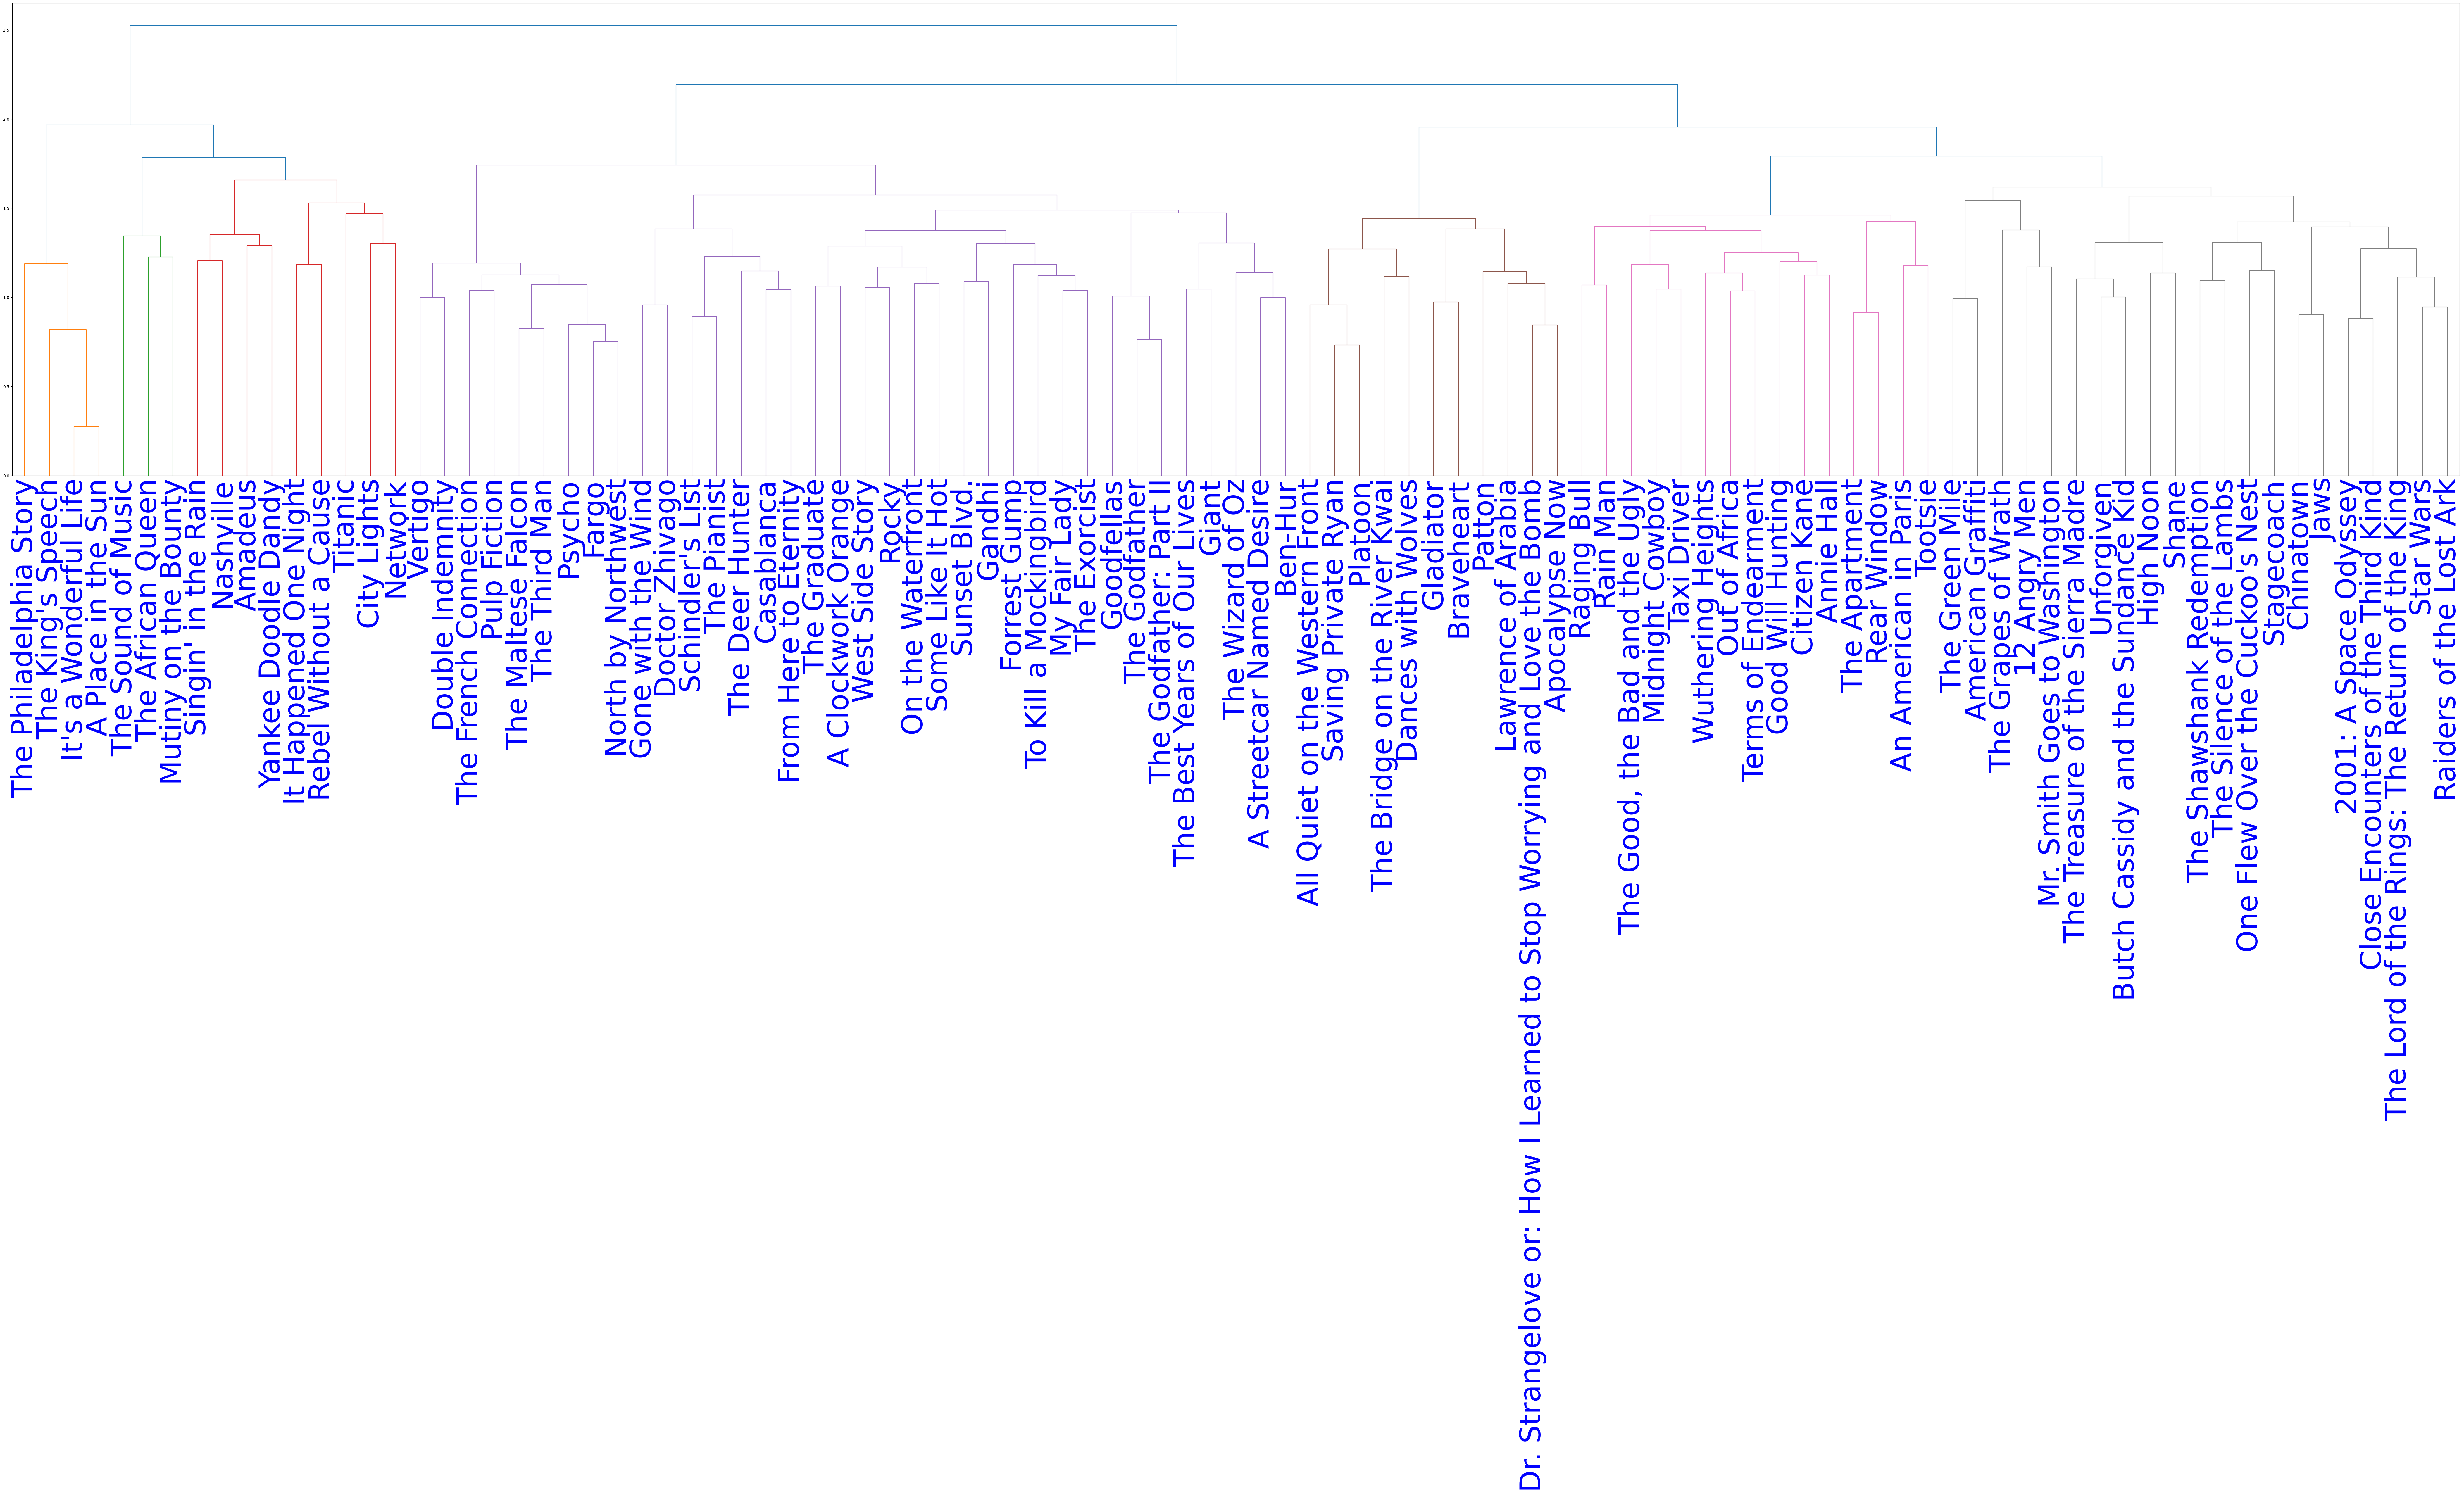

In [53]:
# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,labels=[x for x in movies_df["title"]], leaf_rotation=90, leaf_font_size=70)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('b') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)
# Show the plotted dendrogram
plt.show()